In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump,load
import numpy as np

In [2]:
# Read in all csv
batting_2018 = pd.read_csv("../Resources/2018Batting.csv")
fielding_2018 = pd.read_csv("../Resources/2018Fielding.csv")
pitching_2018 = pd.read_csv("../Resources/2018Pitching.csv")
batting_2019 = pd.read_csv("../Resources/2019Batting.csv")
fielding_2019 = pd.read_csv("../Resources/2019Fielding.csv")
pitching_2019 = pd.read_csv("../Resources/2019Pitching.csv")
batting_2021 = pd.read_csv("../Resources/2021Batting.csv")
fielding_2021 = pd.read_csv("../Resources/2021Fielding.csv")
pitching_2021 = pd.read_csv("../Resources/2021Pitching.csv")
batting_2022 = pd.read_csv("../Resources/2022Batting.csv")
fielding_2022 = pd.read_csv("../Resources/2022Fielding.csv")
pitching_2022 = pd.read_csv("../Resources/2022Pitching.csv")
batting_2023 = pd.read_csv("../Resources/2023Batting.csv")
fielding_2023 = pd.read_csv("../Resources/2023Fielding.csv")
pitching_2023 = pd.read_csv("../Resources/2023Pitching.csv")

In [3]:
import pandas as pd

def clean_merge_year(batting, fielding, pitching, playoff_teams):
    # Merge the datasets
    batfield = pd.merge(batting, fielding, on="Tm")
    full = pd.merge(batfield, pitching, on="Tm")
    
    # Remove rows "League Average" and NaN
    full = full[full['Tm'] != "League Average"]
    full = full.dropna(subset=["Tm"])
    
    # Add playoffs column
    full["playoffs"] = full["Tm"].apply(lambda x: "1" if x in playoff_teams else "0")
    
    # Assuming "W" (Wins) column exists in the datasets and is the metric for ranking
    full['W'] = pd.to_numeric(full['W'], errors='coerce')  # Ensure Wins column is numeric
    full = full.dropna(subset=['W'])  # Drop rows where Wins are NaN

    # Identify the bottom 10 teams based on Wins
    bottom_10_teams = full.nsmallest(10, 'W')['Tm'].tolist()
    full["bottom_10"] = full["Tm"].apply(lambda x: "1" if x in bottom_10_teams else "0")
    
    # Drop unwanted columns
    full = full.drop(columns=["W", "L", "W-L%", "RA/G_x"])
    
    # Set index
    full.set_index("Tm", inplace=True)
    
    # Convert columns to float
    columns_to_convert = full.columns.difference(["playoffs", "bottom_10"])
    float_df = full[columns_to_convert].astype(float)
    
    # Add playoffs and bottom_10 columns back into float_df
    float_df["playoffs"] = full["playoffs"]
    float_df["bottom_10"] = full["bottom_10"]
    
    return float_df


In [4]:
playoff_teams_2018 = ['Chicago Cubs', 'Colorado Rockies', 'Oakland Athletics', 'New York Yankees',
                      'Los Angeles Dodgers', 'Atlanta Braves','Milwaukee Brewers', 'Houston Astros', 
                      'Cleveland Indians','Boston Red Sox']

playoff_teams_2019 = ['Houston Astros', 'New York Yankees', 'Minnesota Twins', 'Oakland Athletics',
                      'Tampa Bay Rays', 'Los Angeles Dodgers','Atlanta Braves', 'St. Louis Cardinals', 
                      'Washington Nationals','Milwaukee Brewers']
playoff_teams_2021 = ['Tampa Bay Rays', 'Houston Astros', 'Chicago White Sox', 'Boston Red Sox',
                      'New York Yankees', 'San Francisco Giants', 'Milwaukee Brewers', 'Houston Astros', 
                      'Los Angeles Dodgers', 'St. Louis Cardinals']
playoff_teams_2022 = ['Houston Astros', 'New York Yankees', 'Cleveland Guardians', 'Toronto Blue Jays',
                      'Seattle Mariners', 'Tampa Bay Rays', 'Los Angeles Dodgers', 'Atlanta Braves', 
                      'St. Louis Cardinals', 'New York Mets', 'San Diego Padres', 'Philadelphia Phillies']
playoff_teams_2023 = ['Baltimore Orioles', 'Houston Astros', 'Minnesota Twins', 'Tampa Bay Rays', 
                      'Texas Rangers', 'Toronto Blue Jays', 'Atlanta Braves', 'Los Angeles Dodgers', 
                      'Milwaukee Brewers', 'Philadelphia Phillies', 'Miami Marlins', 'Arizona Diamondbacks']

# Apply function to datasets for each year
data_2018 = clean_merge_year(batting_2018, fielding_2018, pitching_2018, playoff_teams_2018)
data_2019 = clean_merge_year(batting_2019, fielding_2019, pitching_2019, playoff_teams_2019)
data_2021 = clean_merge_year(batting_2021, fielding_2021, pitching_2021, playoff_teams_2021)
data_2022 = clean_merge_year(batting_2022, fielding_2022, pitching_2022, playoff_teams_2022)
data_2023 = clean_merge_year(batting_2023, fielding_2023, pitching_2023, playoff_teams_2023)

In [5]:
b10_teams_2018 = ['Baltimore Orioles', 'Kansas City Royals', 'Chicago White Sox', 'Miami Marlins',
                      'Detroit Tigers', 'Sand Diego Padres','Texas Rangers', 'Cincinnati Reds', 
                      'Toronto Blue Jays','San Francisco Giants']
b10_teams_2019 = ['Detroit Tigers', 'Baltimore Orioles', 'Miami Marlins', 'Kansas City Royals',
                      'Toronto Blue Jays', 'Seattle Mariners','Pittsburgh Pirates', 'San Diego Padres', 
                      'Colorado Rockies','Los Angeles Angels']
b10_teams_2021 = ['Arizona Diamondbacks', 'Baltimore Orioles', 'Texas Rangers', 'Pittsburgh Pirates',
                      'Washington Nationals', 'Miami Marlins', 'Chicago Cubs', 'Minnesota Twins', 
                      'Kansas City Royals', 'Colorado Rockies']
b10_teams_2022 = ['Washington Nationals', 'Oakland Athletics', 'Cincinnati Reds', 'Pittsburgh Pirates',
                      'Kansas City Royals', 'Detroit Tigers', 'Colorado Rockies', 'Texas Rangers', 
                      'Miami Marlins', 'Los Angeles Angels']
b10_teams_2023 = ['Oakland Athletics', 'Kansas City Royals', 'Colorado Rockies', 'Chicago White Sox', 
                      'Washington Nationals', 'St. Louis Cardinals', 'Los Angeles Angels', 'New York Mets', 
                      'Pittsburgh Pirates', 'Cleveland Guardians']
# Apply function to datasets for each year
data_2018 = clean_merge_year(batting_2018, fielding_2018, pitching_2018, playoff_teams_2018)
data_2019 = clean_merge_year(batting_2019, fielding_2019, pitching_2019, playoff_teams_2019)
data_2021 = clean_merge_year(batting_2021, fielding_2021, pitching_2021, playoff_teams_2021)
data_2022 = clean_merge_year(batting_2022, fielding_2022, pitching_2022, playoff_teams_2022)
data_2023 = clean_merge_year(batting_2023, fielding_2023, pitching_2023, playoff_teams_2023)

In [6]:
data_2018


,#Bat,#Fld,#P,2B,3B,A,AB,BA,BB9,BB_x,...,SO_x,SO_y,SV,TB,WHIP,WP,cSho,tSho,playoffs,bottom_10
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49.0,49.0,30.0,259.0,50.0,1686.0,5460.0,0.235,3.2,560.0,...,1460.0,1448.0,39.0,2170.0,1.254,69.0,1.0,9.0,0,0
Atlanta Braves,58.0,57.0,35.0,314.0,29.0,1439.0,5582.0,0.257,3.9,511.0,...,1290.0,1423.0,40.0,2330.0,1.284,61.0,1.0,11.0,1,0
Baltimore Orioles,56.0,56.0,30.0,242.0,15.0,1537.0,5507.0,0.239,3.7,422.0,...,1412.0,1203.0,28.0,2153.0,1.496,81.0,0.0,7.0,0,1
Boston Red Sox,44.0,43.0,23.0,355.0,31.0,1366.0,5623.0,0.268,3.2,569.0,...,1253.0,1558.0,46.0,2550.0,1.246,51.0,0.0,14.0,1,0
Chicago Cubs,50.0,50.0,35.0,286.0,34.0,1675.0,5624.0,0.258,3.8,576.0,...,1388.0,1333.0,46.0,2308.0,1.315,46.0,0.0,18.0,1,0
Chicago White Sox,51.0,51.0,31.0,259.0,40.0,1431.0,5523.0,0.241,4.1,425.0,...,1594.0,1259.0,34.0,2217.0,1.431,94.0,0.0,8.0,0,1
Cincinnati Reds,53.0,53.0,32.0,251.0,25.0,1608.0,5532.0,0.254,3.3,559.0,...,1376.0,1258.0,38.0,2221.0,1.404,48.0,0.0,6.0,0,1
Cleveland Indians,49.0,48.0,27.0,297.0,19.0,1353.0,5595.0,0.259,2.5,554.0,...,1189.0,1544.0,41.0,2430.0,1.205,54.0,2.0,17.0,1,0
Colorado Rockies,41.0,41.0,21.0,280.0,42.0,1624.0,5541.0,0.256,3.3,507.0,...,1397.0,1409.0,51.0,2412.0,1.310,70.0,0.0,10.0,1,0


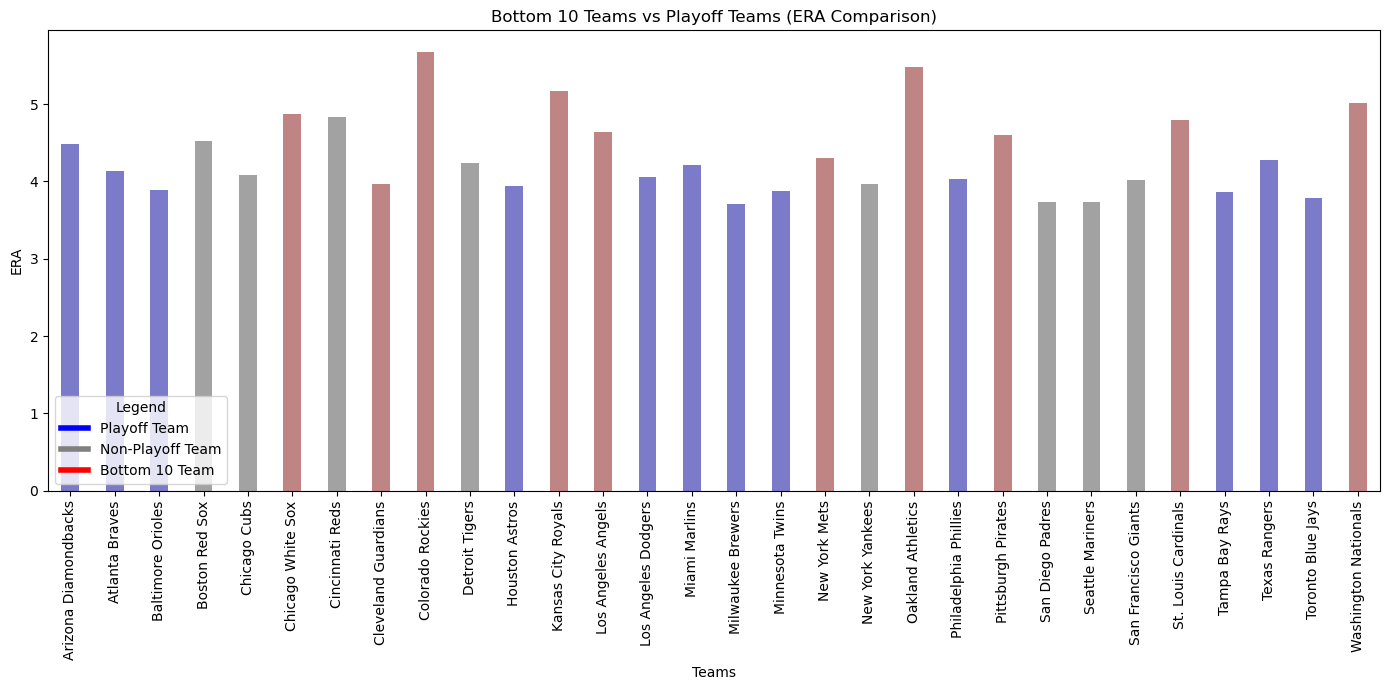

In [7]:
# Plot the data
plt.figure(figsize=(14, 7))
bar_width = 0.4  # Bar width for dodging

# Plotting playoff teams
playoff_plot = sns.barplot(
    x=data_2023.index, y='ERA', hue='playoffs', data=data_2023, dodge=False,
    palette={'0': 'gray', '1': 'blue'}, alpha=0.6, width=bar_width
)

# Plotting bottom 10 teams
bottom10_plot = sns.barplot(
    x=data_2023.index, y='ERA', hue='bottom_10', data=data_2023, dodge=False,
    palette={'0': 'gray', '1': 'red'}, alpha=0.3, width=bar_width
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Manually creating the legend
playoff_legend = plt.Line2D([0], [0], color='blue', lw=4, label='Playoff Team')
non_playoff_legend = plt.Line2D([0], [0], color='gray', lw=4, label='Non-Playoff Team')
bottom10_legend = plt.Line2D([0], [0], color='red', lw=4, label='Bottom 10 Team')

plt.legend(handles=[playoff_legend, non_playoff_legend, bottom10_legend], title='Legend', loc= 'lower left')

plt.xlabel('Teams')
plt.ylabel('ERA')
plt.title('Bottom 10 Teams vs Playoff Teams (ERA Comparison)')
plt.tight_layout()  # Adjust layout for better fit

plt.show()

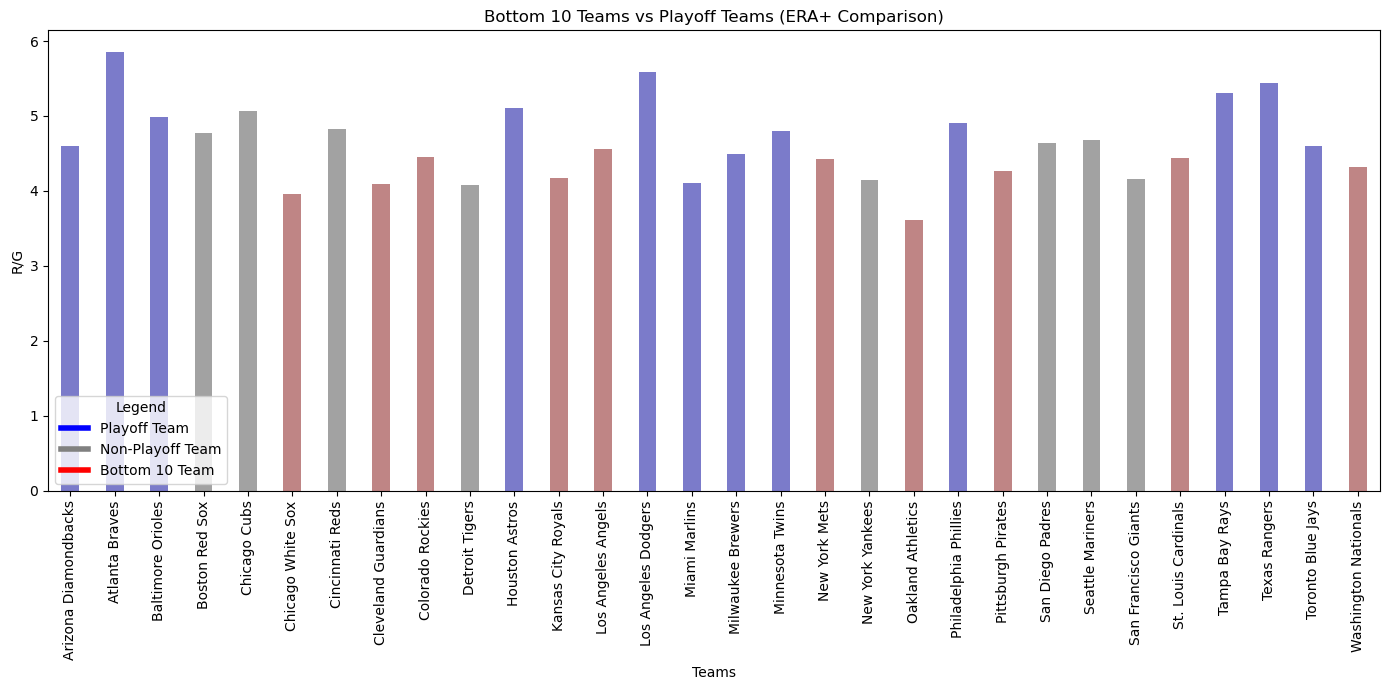

In [8]:
# Plot the data
plt.figure(figsize=(14, 7))
bar_width = 0.4  # Bar width for dodging

# Plotting playoff teams
playoff_plot = sns.barplot(
    x=data_2023.index, y='R/G', hue='playoffs', data=data_2023, dodge=False,
    palette={'0': 'gray', '1': 'blue'}, alpha=0.6, width=bar_width
)

# Plotting bottom 10 teams
bottom10_plot = sns.barplot(
    x=data_2023.index, y='R/G', hue='bottom_10', data=data_2023, dodge=False,
    palette={'0': 'gray', '1': 'red'}, alpha=0.3, width=bar_width
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Manually creating the legend
playoff_legend = plt.Line2D([0], [0], color='blue', lw=4, label='Playoff Team')
non_playoff_legend = plt.Line2D([0], [0], color='gray', lw=4, label='Non-Playoff Team')
bottom10_legend = plt.Line2D([0], [0], color='red', lw=4, label='Bottom 10 Team')

plt.legend(
    handles=[playoff_legend, non_playoff_legend, bottom10_legend], 
    title='Legend', 
    loc='lower left'
)
plt.xlabel('Teams')
plt.ylabel('R/G')
plt.title('Bottom 10 Teams vs Playoff Teams (ERA+ Comparison)')
plt.tight_layout()  # Adjust layout for better fit

plt.show()

In [9]:
Combined_Data = pd.read_csv("../Resources/Combined_Data.csv")
df = pd.read_csv("../Resources/Combined_Data.csv")

df_2024 = pd.read_csv("../Resources/Cleaned_2024.csv")

Combined_Data.drop('Tm', axis=1, inplace=True)

df_2024.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
corr_data = Combined_Data.corr()['playoffs']

low_corr_df = pd.DataFrame(corr_data.loc[(corr_data <= 0.1) & (corr_data >= -0.1)])
low_corr_df.rename(columns={'playoffs': 'correlation'}, inplace=True)

index_values = low_corr_df.index.tolist()

index_values

['BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho']

In [11]:
columns_to_keep = index_values + ['playoffs']

focused_df = Combined_Data[columns_to_keep]

focused_df

,BK,CG_y,Ch,GF,SB,cSho,playoffs
0,5.0,2.0,6150.0,160.0,79.0,1.0,0
1,8.0,2.0,5889.0,160.0,90.0,1.0,1
2,8.0,2.0,5934.0,160.0,81.0,0.0,0
3,3.0,2.0,5819.0,160.0,125.0,0.0,1
4,3.0,1.0,6208.0,162.0,66.0,0.0,1
...,...,...,...,...,...,...,...
145,7.0,0.0,5944.0,162.0,101.0,0.0,0
146,1.0,0.0,5802.0,162.0,160.0,0.0,1
147,4.0,3.0,5789.0,159.0,79.0,1.0,1
148,12.0,1.0,5733.0,161.0,99.0,1.0,1


In [12]:
y = focused_df["playoffs"]
X = focused_df.drop(columns="playoffs")

In [13]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
#                                                     random_state=1, 
                                                    stratify=y)
X_train.shape

(112, 6)

In [14]:
classifier = LogisticRegression(solver='liblinear',
                                max_iter=1000,
                                # random_state=1
                               )
classifier

LogisticRegression(max_iter=1000, solver='liblinear')

In [15]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6517857142857143
Testing Data Score: 0.6578947368421053


In [17]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,1
8,0,0
9,0,1


In [18]:
accuracy_score(y_test, predictions)

0.6578947368421053

In [19]:
dump(classifier, 'log_model.joblib')

model = load('log_model.joblib')

predictions_2024 = model.predict(df_2024[index_values])
predictions_2024

df_2024['predictions'] = predictions_2024
df_2024

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,predictions
0,Arizona Diamondbacks,41,28.9,4.64,66,2515,2239,306,552,113,...,87,4.25,1.361,9.2,1.1,3.1,7.4,2.40,446,0
1,Atlanta Braves,42,28.6,4.43,63,2362,2133,279,521,127,...,113,3.61,1.234,8.2,0.9,2.9,8.9,3.02,417,0
2,Baltimore Orioles,40,27.1,5.17,65,2467,2240,336,559,112,...,119,3.50,1.129,7.2,0.8,2.9,8.6,2.96,418,0
3,Boston Red Sox,42,27.3,4.48,66,2524,2262,296,558,113,...,123,3.55,1.152,7.8,0.9,2.6,8.8,3.40,417,1
4,Chicago Cubs,41,28.2,4.30,66,2486,2188,284,500,99,...,106,3.92,1.291,8.3,1.1,3.3,9.0,2.72,458,0
5,Chicago White Sox,46,28.7,3.09,67,2408,2191,207,477,102,...,82,4.65,1.439,8.9,1.4,4.1,8.7,2.14,482,0
6,Cincinnati Reds,36,27.4,4.36,66,2426,2134,288,485,96,...,108,4.01,1.249,8.1,1.0,3.1,8.5,2.73,457,1
7,Cleveland Guardians,35,26.2,5.08,64,2398,2120,325,508,106,...,113,3.76,1.176,7.7,1.0,2.9,9.0,3.09,418,0
8,Colorado Rockies,39,28.2,4.00,66,2476,2250,264,551,116,...,86,4.69,1.519,9.9,1.1,3.8,6.6,1.73,468,0
9,Detroit Tigers,35,27.3,4.22,65,2425,2184,274,502,100,...,106,3.64,1.222,8.2,0.9,2.8,8.6,3.11,421,0


In [20]:
import numpy as np
import pandas as pd
from joblib import load

# Assuming df_2024 is a pandas DataFrame with your data and 'log_model.joblib' is your saved model
model = load('log_model.joblib')

# Placeholder to count the number of times each team is predicted to make the playoffs
playoff_counts = np.zeros(len(df_2024))

# Number of iterations
n_iterations = 100

for _ in range(n_iterations):
    # Predict playoffs for the dataset
    predictions_2024 = model.predict(df_2024[index_values])
    
    # Increment the counts for playoff predictions
    playoff_counts += predictions_2024

# Add the counts and probabilities to the DataFrame
df_2024['playoff_count'] = playoff_counts
df_2024['playoff_probability'] = playoff_counts / n_iterations

# print(df_2024)
df_2024

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,predictions,playoff_count,playoff_probability
0,Arizona Diamondbacks,41,28.9,4.64,66,2515,2239,306,552,113,...,1.361,9.2,1.1,3.1,7.4,2.40,446,0,0.0,0.0
1,Atlanta Braves,42,28.6,4.43,63,2362,2133,279,521,127,...,1.234,8.2,0.9,2.9,8.9,3.02,417,0,0.0,0.0
2,Baltimore Orioles,40,27.1,5.17,65,2467,2240,336,559,112,...,1.129,7.2,0.8,2.9,8.6,2.96,418,0,0.0,0.0
3,Boston Red Sox,42,27.3,4.48,66,2524,2262,296,558,113,...,1.152,7.8,0.9,2.6,8.8,3.40,417,1,100.0,1.0
4,Chicago Cubs,41,28.2,4.30,66,2486,2188,284,500,99,...,1.291,8.3,1.1,3.3,9.0,2.72,458,0,0.0,0.0
5,Chicago White Sox,46,28.7,3.09,67,2408,2191,207,477,102,...,1.439,8.9,1.4,4.1,8.7,2.14,482,0,0.0,0.0
6,Cincinnati Reds,36,27.4,4.36,66,2426,2134,288,485,96,...,1.249,8.1,1.0,3.1,8.5,2.73,457,1,100.0,1.0
7,Cleveland Guardians,35,26.2,5.08,64,2398,2120,325,508,106,...,1.176,7.7,1.0,2.9,9.0,3.09,418,0,0.0,0.0
8,Colorado Rockies,39,28.2,4.00,66,2476,2250,264,551,116,...,1.519,9.9,1.1,3.8,6.6,1.73,468,0,0.0,0.0
9,Detroit Tigers,35,27.3,4.22,65,2425,2184,274,502,100,...,1.222,8.2,0.9,2.8,8.6,3.11,421,0,0.0,0.0


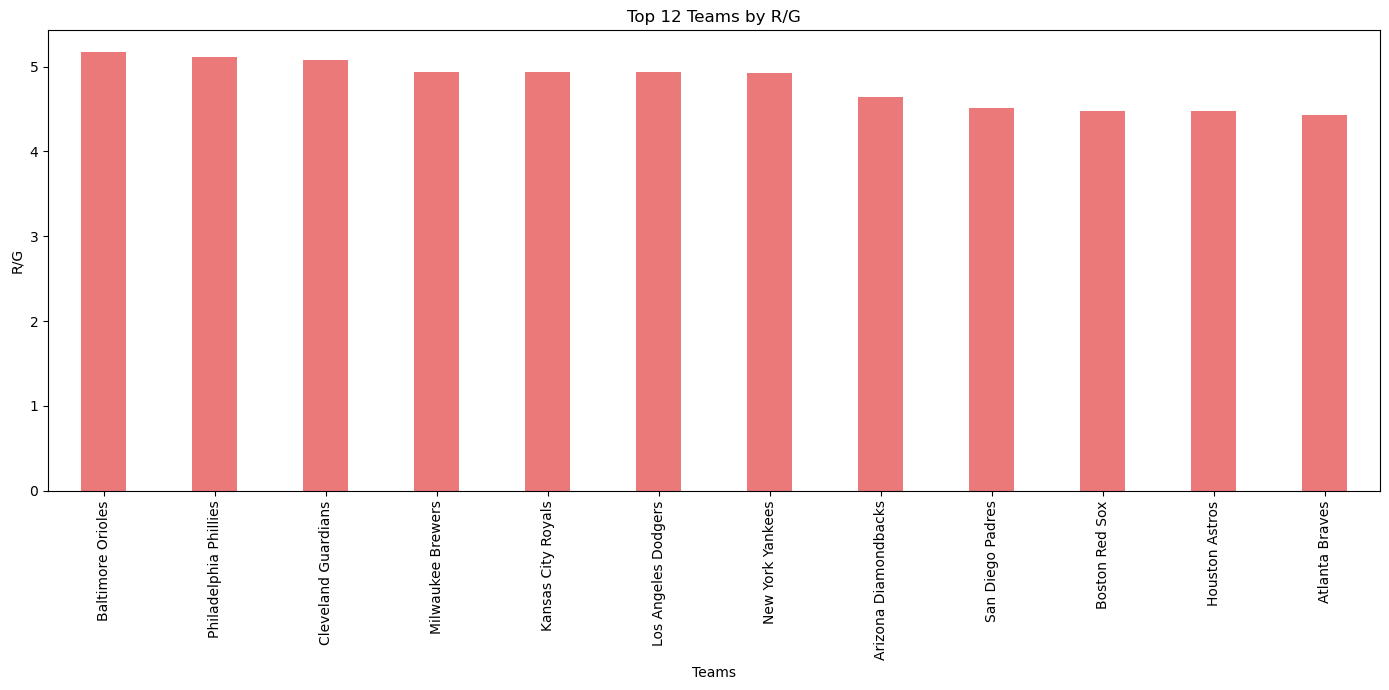

In [21]:
# Sort the DataFrame by 'R/G' in descending order and select the top 12 teams
top_12_teams = df_2024.sort_values(by='R/G', ascending=False).head(12)

plt.figure(figsize=(14, 7))
bar_width = 0.4  # Bar width for dodging

# Plotting R/G for the top 12 teams
sns.barplot(
    x='Tm', y='R/G', data=top_12_teams,
    color='Red', alpha=0.6, width=bar_width
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.xlabel('Teams')
plt.ylabel('R/G')
plt.title('Top 12 Teams by R/G')
plt.tight_layout()  # Adjust layout for better fit

plt.show()


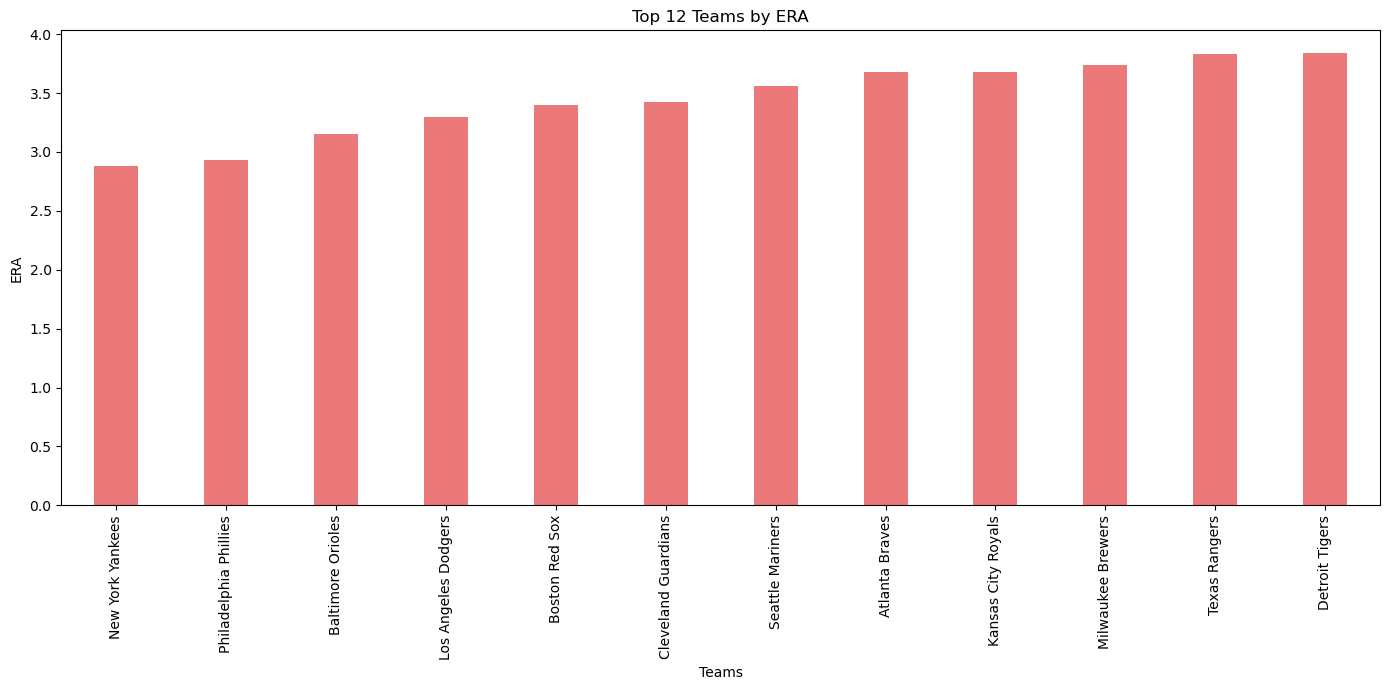

In [22]:
# Sort the DataFrame by 'R/G' in descending order and select the top 12 teams
top_12_teams_ERA = df_2024.sort_values(by='ERA', ascending=True).head(12)

plt.figure(figsize=(14, 7))
bar_width = 0.4  # Bar width for dodging

# Plotting R/G for the top 12 teams
sns.barplot(
    x='Tm', y='ERA', data=top_12_teams_ERA,
    color='Red', alpha=0.6, width=bar_width
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.xlabel('Teams')
plt.ylabel('ERA')
plt.title('Top 12 Teams by ERA')
plt.tight_layout()  # Adjust layout for better fit

plt.show()


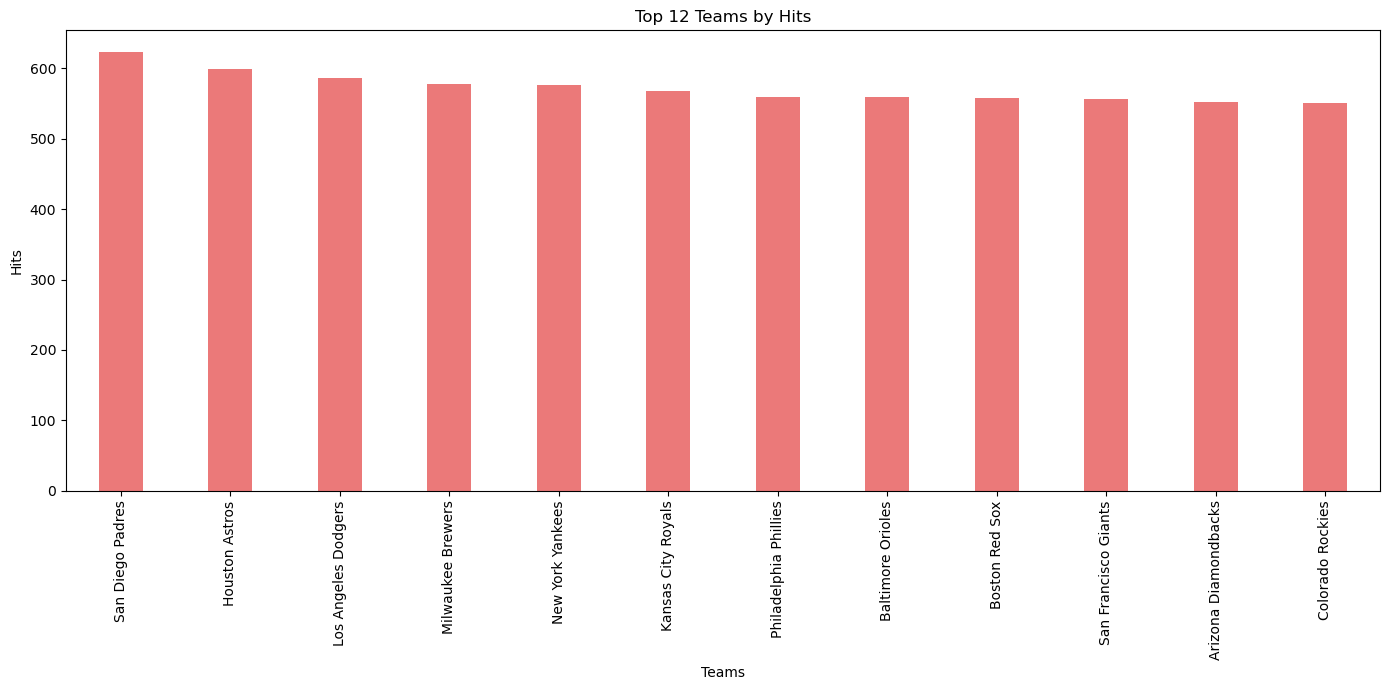

In [23]:
# Sort the DataFrame by 'R/G' in descending order and select the top 12 teams
top_12_teams_hits = df_2024.sort_values(by='H_x', ascending=False).head(13)

plt.figure(figsize=(14, 7))
bar_width = 0.4  # Bar width for dodging

# Plotting R/G for the top 12 teams
sns.barplot(
    x='Tm', y='H_x', data=top_12_teams_hits,
    color='Red', alpha=0.6, width=bar_width
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.xlabel('Teams')
plt.ylabel('Hits')
plt.title('Top 12 Teams by Hits')
plt.tight_layout()  # Adjust layout for better fit

plt.show()


In [24]:
top_12_teams

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,predictions,playoff_count,playoff_probability
2,Baltimore Orioles,40,27.1,5.17,65,2467,2240,336,559,112,...,1.129,7.2,0.8,2.9,8.6,2.96,418,0,0.0,0.0
20,Philadelphia Phillies,34,29.2,5.11,65,2487,2200,332,560,95,...,1.126,7.3,0.7,2.8,9.2,3.28,430,0,0.0,0.0
7,Cleveland Guardians,35,26.2,5.08,64,2398,2120,325,508,106,...,1.176,7.7,1.0,2.9,9.0,3.09,418,0,0.0,0.0
15,Milwaukee Brewers,42,26.5,4.94,66,2533,2257,326,578,109,...,1.251,8.1,1.1,3.2,8.1,2.55,460,0,0.0,0.0
11,Kansas City Royals,36,27.5,4.94,67,2487,2243,331,568,121,...,1.265,8.3,0.8,3.1,8.1,2.59,475,1,100.0,1.0
13,Los Angeles Dodgers,43,30.3,4.94,67,2601,2290,331,586,129,...,1.131,7.3,1.0,2.9,8.8,3.02,423,0,0.0,0.0
18,New York Yankees,38,28.6,4.93,68,2579,2265,335,577,95,...,1.118,6.9,0.9,3.2,8.6,2.71,456,0,0.0,0.0
0,Arizona Diamondbacks,41,28.9,4.64,66,2515,2239,306,552,113,...,1.361,9.2,1.1,3.1,7.4,2.40,446,0,0.0,0.0
22,San Diego Padres,36,28.1,4.51,70,2638,2374,316,623,106,...,1.212,8.0,1.1,2.9,8.8,3.06,440,0,0.0,0.0
3,Boston Red Sox,42,27.3,4.48,66,2524,2262,296,558,113,...,1.152,7.8,0.9,2.6,8.8,3.40,417,1,100.0,1.0


In [25]:
top_12_teams_ERA

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,predictions,playoff_count,playoff_probability
18,New York Yankees,38,28.6,4.93,68,2579,2265,335,577,95,...,1.118,6.9,0.9,3.2,8.6,2.71,456,0,0.0,0.0
20,Philadelphia Phillies,34,29.2,5.11,65,2487,2200,332,560,95,...,1.126,7.3,0.7,2.8,9.2,3.28,430,0,0.0,0.0
2,Baltimore Orioles,40,27.1,5.17,65,2467,2240,336,559,112,...,1.129,7.2,0.8,2.9,8.6,2.96,418,0,0.0,0.0
13,Los Angeles Dodgers,43,30.3,4.94,67,2601,2290,331,586,129,...,1.131,7.3,1.0,2.9,8.8,3.02,423,0,0.0,0.0
3,Boston Red Sox,42,27.3,4.48,66,2524,2262,296,558,113,...,1.152,7.8,0.9,2.6,8.8,3.40,417,1,100.0,1.0
7,Cleveland Guardians,35,26.2,5.08,64,2398,2120,325,508,106,...,1.176,7.7,1.0,2.9,9.0,3.09,418,0,0.0,0.0
23,Seattle Mariners,40,28.7,3.90,68,2485,2215,265,495,86,...,1.077,7.2,1.1,2.4,8.6,3.51,375,0,0.0,0.0
1,Atlanta Braves,42,28.6,4.43,63,2362,2133,279,521,127,...,1.234,8.2,0.9,2.9,8.9,3.02,417,0,0.0,0.0
11,Kansas City Royals,36,27.5,4.94,67,2487,2243,331,568,121,...,1.265,8.3,0.8,3.1,8.1,2.59,475,1,100.0,1.0
15,Milwaukee Brewers,42,26.5,4.94,66,2533,2257,326,578,109,...,1.251,8.1,1.1,3.2,8.1,2.55,460,0,0.0,0.0


In [26]:
top_12_teams_hits

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,predictions,playoff_count,playoff_probability
31,NaN,1163,28.2,4.33,1978,74240,66465,8569,15976,3105,...,1.260,8.2,1.0,3.2,8.5,2.68,13217,0,0.0,0.0
22,San Diego Padres,36,28.1,4.51,70,2638,2374,316,623,106,...,1.212,8.0,1.1,2.9,8.8,3.06,440,0,0.0,0.0
10,Houston Astros,40,29.0,4.48,67,2544,2304,300,599,101,...,1.328,8.1,1.2,3.8,8.5,2.23,478,0,0.0,0.0
13,Los Angeles Dodgers,43,30.3,4.94,67,2601,2290,331,586,129,...,1.131,7.3,1.0,2.9,8.8,3.02,423,0,0.0,0.0
15,Milwaukee Brewers,42,26.5,4.94,66,2533,2257,326,578,109,...,1.251,8.1,1.1,3.2,8.1,2.55,460,0,0.0,0.0
18,New York Yankees,38,28.6,4.93,68,2579,2265,335,577,95,...,1.118,6.9,0.9,3.2,8.6,2.71,456,0,0.0,0.0
11,Kansas City Royals,36,27.5,4.94,67,2487,2243,331,568,121,...,1.265,8.3,0.8,3.1,8.1,2.59,475,1,100.0,1.0
20,Philadelphia Phillies,34,29.2,5.11,65,2487,2200,332,560,95,...,1.126,7.3,0.7,2.8,9.2,3.28,430,0,0.0,0.0
2,Baltimore Orioles,40,27.1,5.17,65,2467,2240,336,559,112,...,1.129,7.2,0.8,2.9,8.6,2.96,418,0,0.0,0.0
3,Boston Red Sox,42,27.3,4.48,66,2524,2262,296,558,113,...,1.152,7.8,0.9,2.6,8.8,3.40,417,1,100.0,1.0


In [27]:
# Ensure 'Tm' column is in all three DataFrames
if 'Tm' in top_12_teams.columns and 'Tm' in top_12_teams_ERA.columns and 'Tm' in top_12_teams_hits.columns:
    # Find common teams using set intersection
    common_teams = set(top_12_teams['Tm']).intersection(set(top_12_teams_ERA['Tm'])).intersection(set(top_12_teams_hits['Tm']))
    
    # Convert the result to a DataFrame if needed
    common_teams_df = pd.DataFrame({'Tm': list(common_teams)})
    
    print("Common teams:")
    print(common_teams_df)
else:
    print("All three DataFrames must have a 'Tm' column.")


Common teams:
                      Tm
0  Philadelphia Phillies
1       New York Yankees
2      Milwaukee Brewers
3      Baltimore Orioles
4         Boston Red Sox
5    Los Angeles Dodgers
6     Kansas City Royals
